In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('laptop.csv', sep=',')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
X = df[['Ram', 'Ppi', 'SSD', 'Ips']]
y = df['Price']

In [4]:
print(df.describe())

               Ram       Weight        Price  TouchScreen          Ips  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      8.447761     2.041100    10.828218     0.146897     0.279654   
std       5.098771     0.669241     0.619565     0.354142     0.449006   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.387379     0.000000     0.000000   
50%       8.000000     2.040000    10.872255     0.000000     0.000000   
75%       8.000000     2.310000    11.287447     0.000000     1.000000   
max      64.000000     4.700000    12.691441     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1273.000000  1273.000000  1273.000000  
mean    146.950812   413.715632   186.252946  
std      42.926775   518.054486   186.531571  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.000000   256.000000  
75% 

In [5]:
shape = df.shape

print("Jumlah baris:", shape[0])
print("Jumlah kolom:", shape[1])

Jumlah baris: 1273
Jumlah kolom: 13


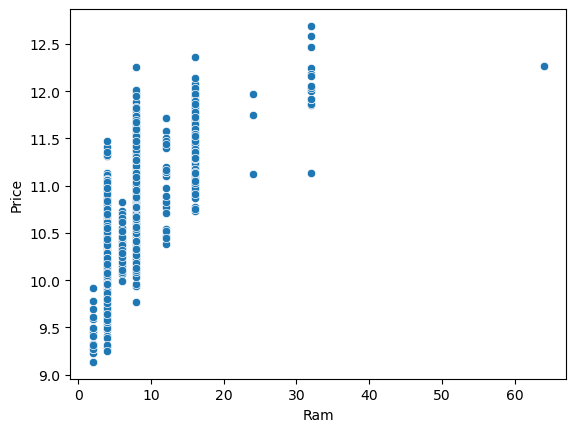

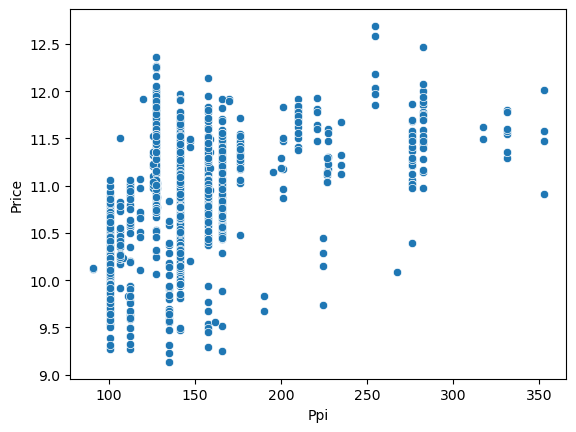

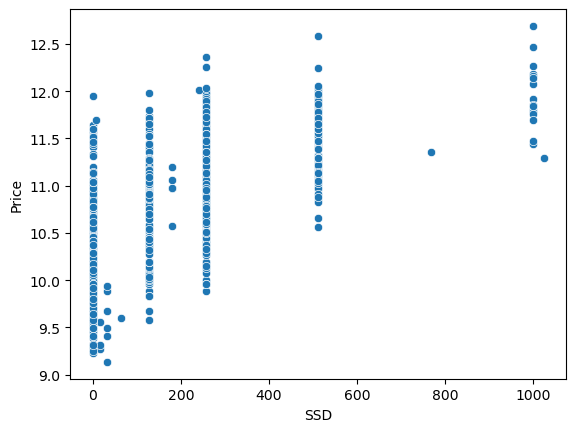

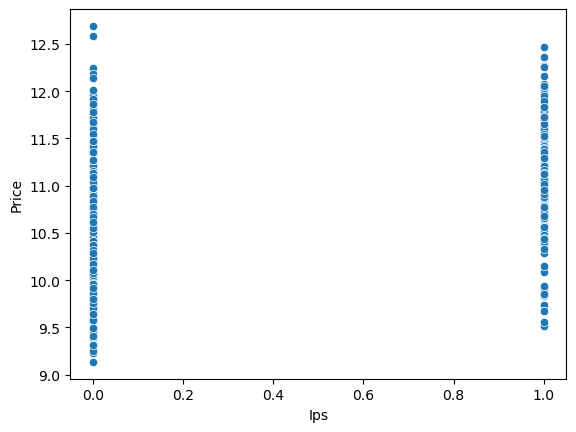

In [6]:
for column in X.columns:
    sns.scatterplot(x=column, y='Price', data=df)
    plt.show()

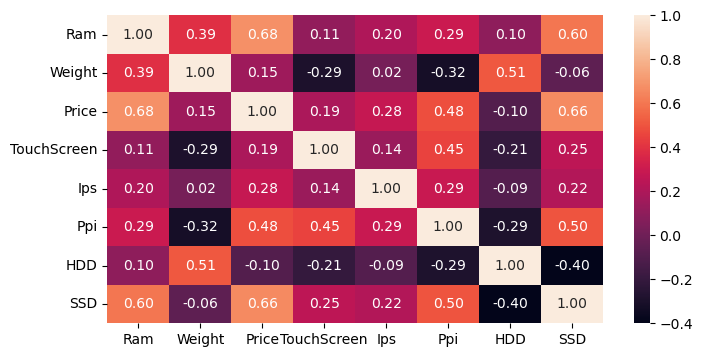

In [7]:
plt.figure(figsize=(8, 4))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

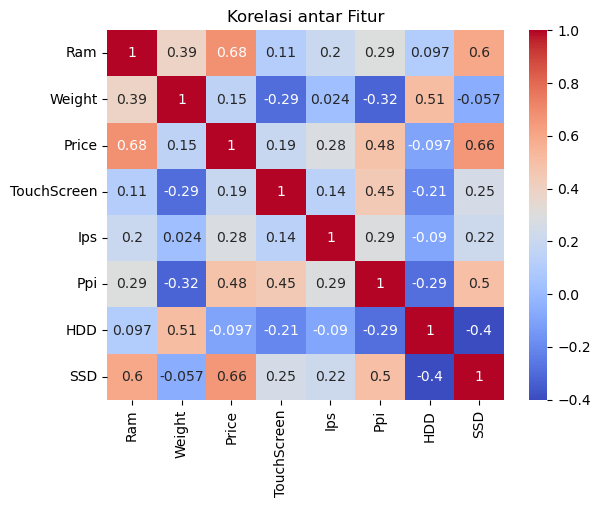

In [8]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()

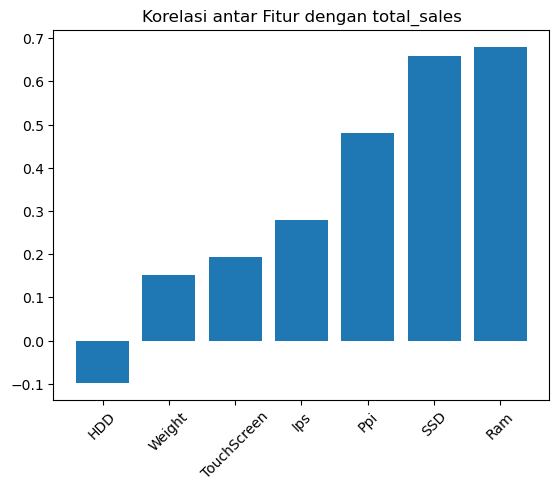

In [9]:
# Menghitung korelasi antar fitur dengan target
correlations = df.corr(numeric_only=True)['Price'].drop('Price').sort_values()

# Visualisasi korelasi antar fitur dengan target
plt.bar(correlations.index, correlations)
plt.xticks(rotation=45)
plt.title('Korelasi antar Fitur dengan total_sales')
plt.show()

In [10]:
def datates(nilai,state):
    # Pisahkan data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nilai, random_state=state)
    
    print(X_train.shape)
    print(y_test.shape)
    
    # Model regresi
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    
    # Mencari nilai coef dan intercept
    print('Intercept ',regr.intercept_)
    print('Coef ', regr.coef_)
    
    # Prediksi menggunakan data uji
    y_pred = regr.predict(X_test)
    
    # Evaluasi model menggunakan MSE, R-squared, dan MAE
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    pred =regr.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("Mean Absolute Error:", mae)
    print("rmse:", rmse)

In [11]:
datates(0.2,28)

(1018, 4)
(255,)
Intercept  9.789789580455126
Coef  [0.05066249 0.00270537 0.00101461 0.09644898]
Mean Squared Error: 0.1229477460451614
R-squared: 0.6448298725793673
Mean Absolute Error: 0.28059956746726705
rmse: 0.35063905379344357


In [12]:
datates(0.3,28)

(891, 4)
(382,)
Intercept  9.801818312087995
Coef  [0.04996461 0.00266714 0.0010229  0.0915603 ]
Mean Squared Error: 0.12910311615583597
R-squared: 0.6218434777659417
Mean Absolute Error: 0.28842459267850545
rmse: 0.35930922080547273
